# Introduction to machine learning and deep learning
### L2 IA & Sciences des Organisations (Université Paris-Dauphine)
### Teacher: Nicolas Schreuder
# Lab 1: Detecting spam emails with the k-Nearest Neighbors algorithm 

In this notebook, we'll explore the **Nearest Neighbors** classification algorithm on the **spam** dataset.

Our goal will be to train and optimize a Nearest Neighbors classifier to distinguish *spam* from *"ham"* emails.

## Loading the dataset

We'll fetch the dataset from [OpenML](https://openml.org). It is a public repository for machine learning data and experiments, that allows anyone to upload open datasets. 

__Remark__: we encourage you to have a look at the documentation of the objects that you will use in this notebook by clicking on the provided hyperlinks (or by browsing the documentation by yourself).   
The more familiar you get with scikit-learn's documentation, the more *autonomous* you will become.

We'll also use Python's `pandas` and `numpy` modules to manipulate the dataset.

In [1]:
import pandas as pd
import numpy as np

The **spam** dataset is hosted [here](https://openml.org/search?type=data&status=active&id=44).

Have a look at its description and fetch it using [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) from scikit-learn.

In [2]:
from sklearn.datasets import fetch_openml
spam = fetch_openml(name='spambase', parser="pandas", as_frame=True)

Print the loaded dataset. What do you obtain?

In [3]:
spam

{'data':       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0               0.00               0.64           0.64           0.0   
 1               0.21               0.28           0.50           0.0   
 2               0.06               0.00           0.71           0.0   
 3               0.00               0.00           0.00           0.0   
 4               0.00               0.00           0.00           0.0   
 ...              ...                ...            ...           ...   
 4596            0.31               0.00           0.62           0.0   
 4597            0.00               0.00           0.00           0.0   
 4598            0.30               0.00           0.30           0.0   
 4599            0.96               0.00           0.00           0.0   
 4600            0.00               0.00           0.65           0.0   
 
       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0              0.32            0.00

[`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) ouputs a dictionary-like object (a [`Bunch`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch)) that has several attributes. 

Look at the documentation to see its attributes. We'll extract a pandas DataFrame from `spam` using its `frame` attribute.

In [4]:
spam_df = spam.frame

We'll display the first rows of the obtained DataFrame using `head()`.

In [5]:
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Exploring the data

First, we check if the dataset is *balanced*.

In [6]:
spam_df['class'].astype(int).mean()

0.39404477287546186

In the dataset, 39.4% of observations are spam emails. The dataset is not too unbalanced.

Let us now identify the word frequencies that differ the most (in average) between spam and ham emails.

The following table displays the average frequency of words for the two classes.

In [7]:
spam_df.groupby('class').mean()

C:\Users\gabriel\AppData\Local\Temp\ipykernel_13956\2581581243.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spam_df.groupby('class').mean()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
class,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


Let us sort the columns according to the absolute difference of word frequencies between the two classes. 

In [8]:
average_freq = spam_df.groupby('class').mean().diff().abs().drop('0', axis=0)

C:\Users\gabriel\AppData\Local\Temp\ipykernel_13956\4288837228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_freq = spam_df.groupby('class').mean().diff().abs().drop('0', axis=0)


In [9]:
average_freq.sort_values(by=average_freq.last_valid_index(), axis=1, ascending=False)

,capital_run_length_total,capital_run_length_longest,capital_run_length_average,word_freq_george,word_freq_you,word_freq_your,word_freq_hp,word_freq_free,word_freq_hpl,char_freq_%21,...,char_freq_%23,char_freq_%28,word_freq_conference,word_freq_direct,word_freq_report,char_freq_%3B,char_freq_%5B,word_freq_parts,word_freq_will,word_freq_table
class,,,,,,,,,,,,,,,,,,,,,
1,309.148468,86.17878,7.141864,1.263716,0.994199,0.941668,0.877994,0.444775,0.422822,0.403729,...,0.057164,0.049608,0.049125,0.046399,0.041171,0.029708,0.014485,0.014013,0.013649,0.006973


We observe that the words "George", "you" and "your" have the biggest frequency difference across the two classes.

In [10]:
spam_df.groupby('class').mean()['word_freq_george']

C:\Users\gabriel\AppData\Local\Temp\ipykernel_13956\1237637124.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spam_df.groupby('class').mean()['word_freq_george']


class
0    1.265265
1    0.001550
Name: word_freq_george, dtype: float64

The word "George" corresponds to 1.27% of the words in non-spam emails (in average) whereas it corresponds to 0.01% for spam emails. A simple decision rule could be to predict spam if the word appears and non spam otherwise.

In [11]:
y_pred = (spam_df['word_freq_george']==0).astype(int)

In [35]:
y_pred 

array(['0', '0', '0', ..., '1', '1', '0'], dtype=object)

Compare the prediction to the truth. What is the percentage of emails that are correctly classified?

## Fitting the nearest neighbors algorithm

## Train-test split

Our goal is to train a learning algorithm using the data to identify *future* spam emails. 

If we use all the currently available data for training the algorithm, we will not be able to accurately estimate the model's predictive ability on unseen emails.

In order to avoid this issue, we will split the dataset in two datasets:
- a *training dataset*, which will be used to *train the algorithm*;
- a *testing dataset*, which will be used to *estimate the performance* of the model trained on the training dataset.

We begin by extracting the feature matrix $X$ and the target vector $y$ from the raw dataset as `numpy` arrays. This structure will be more convenient to manipulate the data with scikit-learn. We use the attributes `data` and `target` from `spam` instance.

In [12]:
X, y = np.asarray(spam.data), np.asarray(spam.target)

The function `train_test_split` from `sklearn.model_selection` *randomly* splits a given dataset into a training dataset and a testing dataset. We can specify the proportion of data that will end up in the testing dataset using the `test_size` parameter. It is usually set between $0.2$ and $0.4$.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Change the size of the testing dataset to 40% and check that the numpy array `X_test`has the right shape.

## Pre-processing the data

In general, it is important to pre-process the features $X$ before applying any machine learning algorithm on top of it.

The most basic pre-processing consists in centering (setting the average to 0) and standardizing (setting the standard deviation to 1) the features.

We use the `StandardScaler()` function from *sklearn* as follows. 


Pay attention to how we apply the scaler: we first `fit` the function to the training features before pre-processing the training features with the `transform` method.

Since our method will be fine-tuned for scaled data, we also need to pre-process the testing dataset and any data that we will input in our algorithm.

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We can check that the data is now *normalized*.

In [15]:
np.mean(X_train, axis=0), np.std(X_train, axis=0)

(array([-1.05538529e-16,  9.43430979e-17,  9.80952724e-16,  4.44153858e-16,
         5.20822171e-16, -1.48345794e-16, -2.02409906e-16, -1.95978499e-16,
        -8.01233217e-16,  9.02659590e-16, -7.50503869e-16, -3.19788192e-16,
         2.58454403e-16,  1.40501827e-16, -3.35644211e-16, -9.56826061e-16,
         2.90420724e-16,  1.08069178e-15,  1.03195575e-16, -4.78223396e-17,
        -2.97415646e-16,  2.60962749e-16,  6.66823394e-17,  1.09317317e-15,
        -1.94478664e-16, -5.48043322e-17, -3.75769119e-16, -4.95256010e-16,
        -6.57289957e-16,  7.52331255e-17,  2.83072392e-17, -1.62327019e-16,
         6.05192225e-17, -2.10752740e-16, -4.30125225e-16, -1.67197174e-16,
        -6.25603779e-16, -1.56719875e-16,  2.98363818e-16,  2.59454294e-17,
        -2.66462146e-16,  3.79458369e-16, -2.61436835e-17,  2.21613618e-16,
         6.61892901e-16,  1.34468006e-17,  3.25895280e-16,  1.97245601e-16,
         6.53807581e-17,  3.91698406e-16, -5.30803834e-17,  2.76573105e-16,
         2.7

Note that the means are not exactly $0$ but a value of order $10^{-17}$ can usually considered as $0$ (see [`numpy.finfo`](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html) and [machine epsilon on Wikipedia](https://en.wikipedia.org/wiki/Machine_epsilon) for more details).

## Training the algorithm


We are going to use the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) implementation of the Nearest Neighbors algorithm from scikit-learn.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

We will create instance of the class [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) as follows. 

The `n_neighbors` parameter determines the number of neighbors that will be considered.

The number of neighbors is set to $6$ for no particular reason, you can change this value if you wish.

In [17]:
neigh = KNeighborsClassifier(n_neighbors=6)

In order to fit the NN algorithm, we call the `fit` method on our instantiated classifier `neigh`.

We input the (pre-processed) training data `X_train` and `y_train` to specify which data we use for training.

In [18]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In order to make predictions, we use the `predict` method. We store the results in the `y_pred` variable.

In [19]:
y_pred = neigh.predict(X_test)

c:\Users\gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Let us check how well the algorithm performs. We will use the `accuracy_score` function from *sklearn*.

In [ ]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_pred, y_test)

0.8950036205648081

## Finetuning the hyperparameter $k$ 

The number of neighbours is a *hyperparameter* that can be fine-tuned to improve the predictive ability of the nearest neighbour classifier. 


When evaluating different values for the number of neighbours, there is a risk of overfitting on the testing dataset because the parameters can be tweaked until the classifier performs optimally (on the test set). 

The cross-validation approach has been designed to avoid such an issue. It consists in splitting the initial dataset into three dataset: the *train set*, the *validation set* and the *test set*. Each set is used as follows: 

- train the models (corresponding to different hyperparameters' values) on the train set;
- compare the performance of the models on the validation set;
- evaluate performance of the best model on the test set.

We'll use the function
[`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) from sklearn to perform $k$-fold cross validation.

In [22]:
from sklearn.model_selection import cross_val_score

mean_scores = []
std_scores = []

for k in range(1, 30):
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(1-scores.mean())    
    std_scores.append(scores.std())    
    
mean_scores = np.asarray(mean_scores)
std_scores = np.asarray(std_scores)

We will use the `matplotlib` library to make (nice) plots.

In [23]:
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Let us plot the average scores computed using $k$-fold cross-validation as a function of the number of neighbours.

Text(0, 0.5, 'Misclassification percentage')

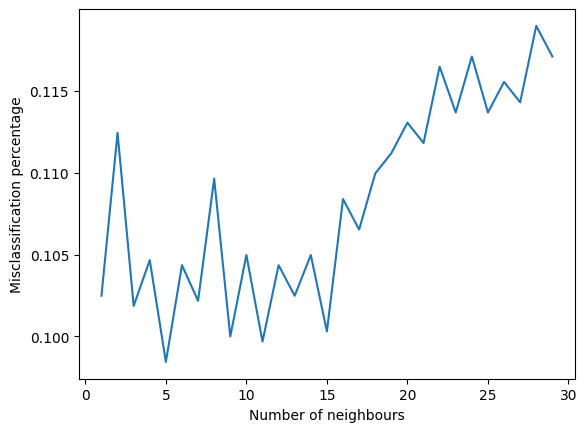

In [24]:
plt.plot(range(1, 30), mean_scores)
plt.xlabel('Number of neighbours')
plt.ylabel('Misclassification percentage')

How many neighbours would you pick?

# A more compact approach

In the previous section, we went step-by-step through the procedure to train and finetune the nearest neighbour classification model. We will now see how to obtain the same results with fewer lines of codes using functions from sklearn.

In particular, we'll use the [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function from sklearn which performs $k$-fold cross validation automatically for a given set of hyperparameters's values.

In [25]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

nn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier())

In [26]:
parameters = {'kneighborsclassifier__n_neighbors':range(1, 30)}
clf = GridSearchCV(nn, parameters, verbose=1)

In [27]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 30)},
             verbose=1)

In [28]:
clf.best_params_

{'kneighborsclassifier__n_neighbors': 9}

In [29]:
y_pred = clf.predict(X_test)

In [30]:
accuracy_score(y_pred, y_test)

0.9116582186821144

91% of emails are classified correctly, there are less than 9% of mistakes. This is not bad for a first learning algorithm.

Hidden behind the accuracy score, there are two types of mistakes that can be made:
- misclassifying a spam as a ham;
- misclassifying a ham as a spam.

There is a trade-off between these two types or errors: decreasing one of the two errors usually implies increasing the other one.  

Note that the second type of error is less desirable because it could lead someone to miss an important email. We will see later a technique to control these errors and to find a good trade-off.

We can use the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function from sklearn to get details about the mistakes that were made. 

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, y_pred, labels=['0', '1'])

array([[765,  39],
       [ 83, 494]], dtype=int64)

The confusion matrix should be read as follows:

- 765 hams and 494 spams were classified correctly;

- 39 hams were classifier as spams;

- 83 spams were classified as hams.

# Bonus question

The k nearest neighbour model treats each feature equally (the Euclidian distance does not weight one feature more than another). We have seen that some word frequencies differ more than other (on average) across spam and non-spam emails. 

Following what we did in the previous section, fit the NN algorithm on a subet of features. Do you obtain better perfomances?

## What's next?

We have seen how to fit and fine-tune a simple classification model on a tabular dataset. We obtained a pretty good overall performance (91% of accuracy). Can we do better? In the remainder of the semester, we will see many different learning methods. For instance, we will study the *random forest* classifier that we fit in the following cell (without any fine-tuning).

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9565532223026793

The nearest neighbour model is simple to understand, easy to implement but usually not the best avaiable prediction model. Given its easy-of-use, it can be used as a baseline against more complex learning algorithms.